# Guy Ben Dor

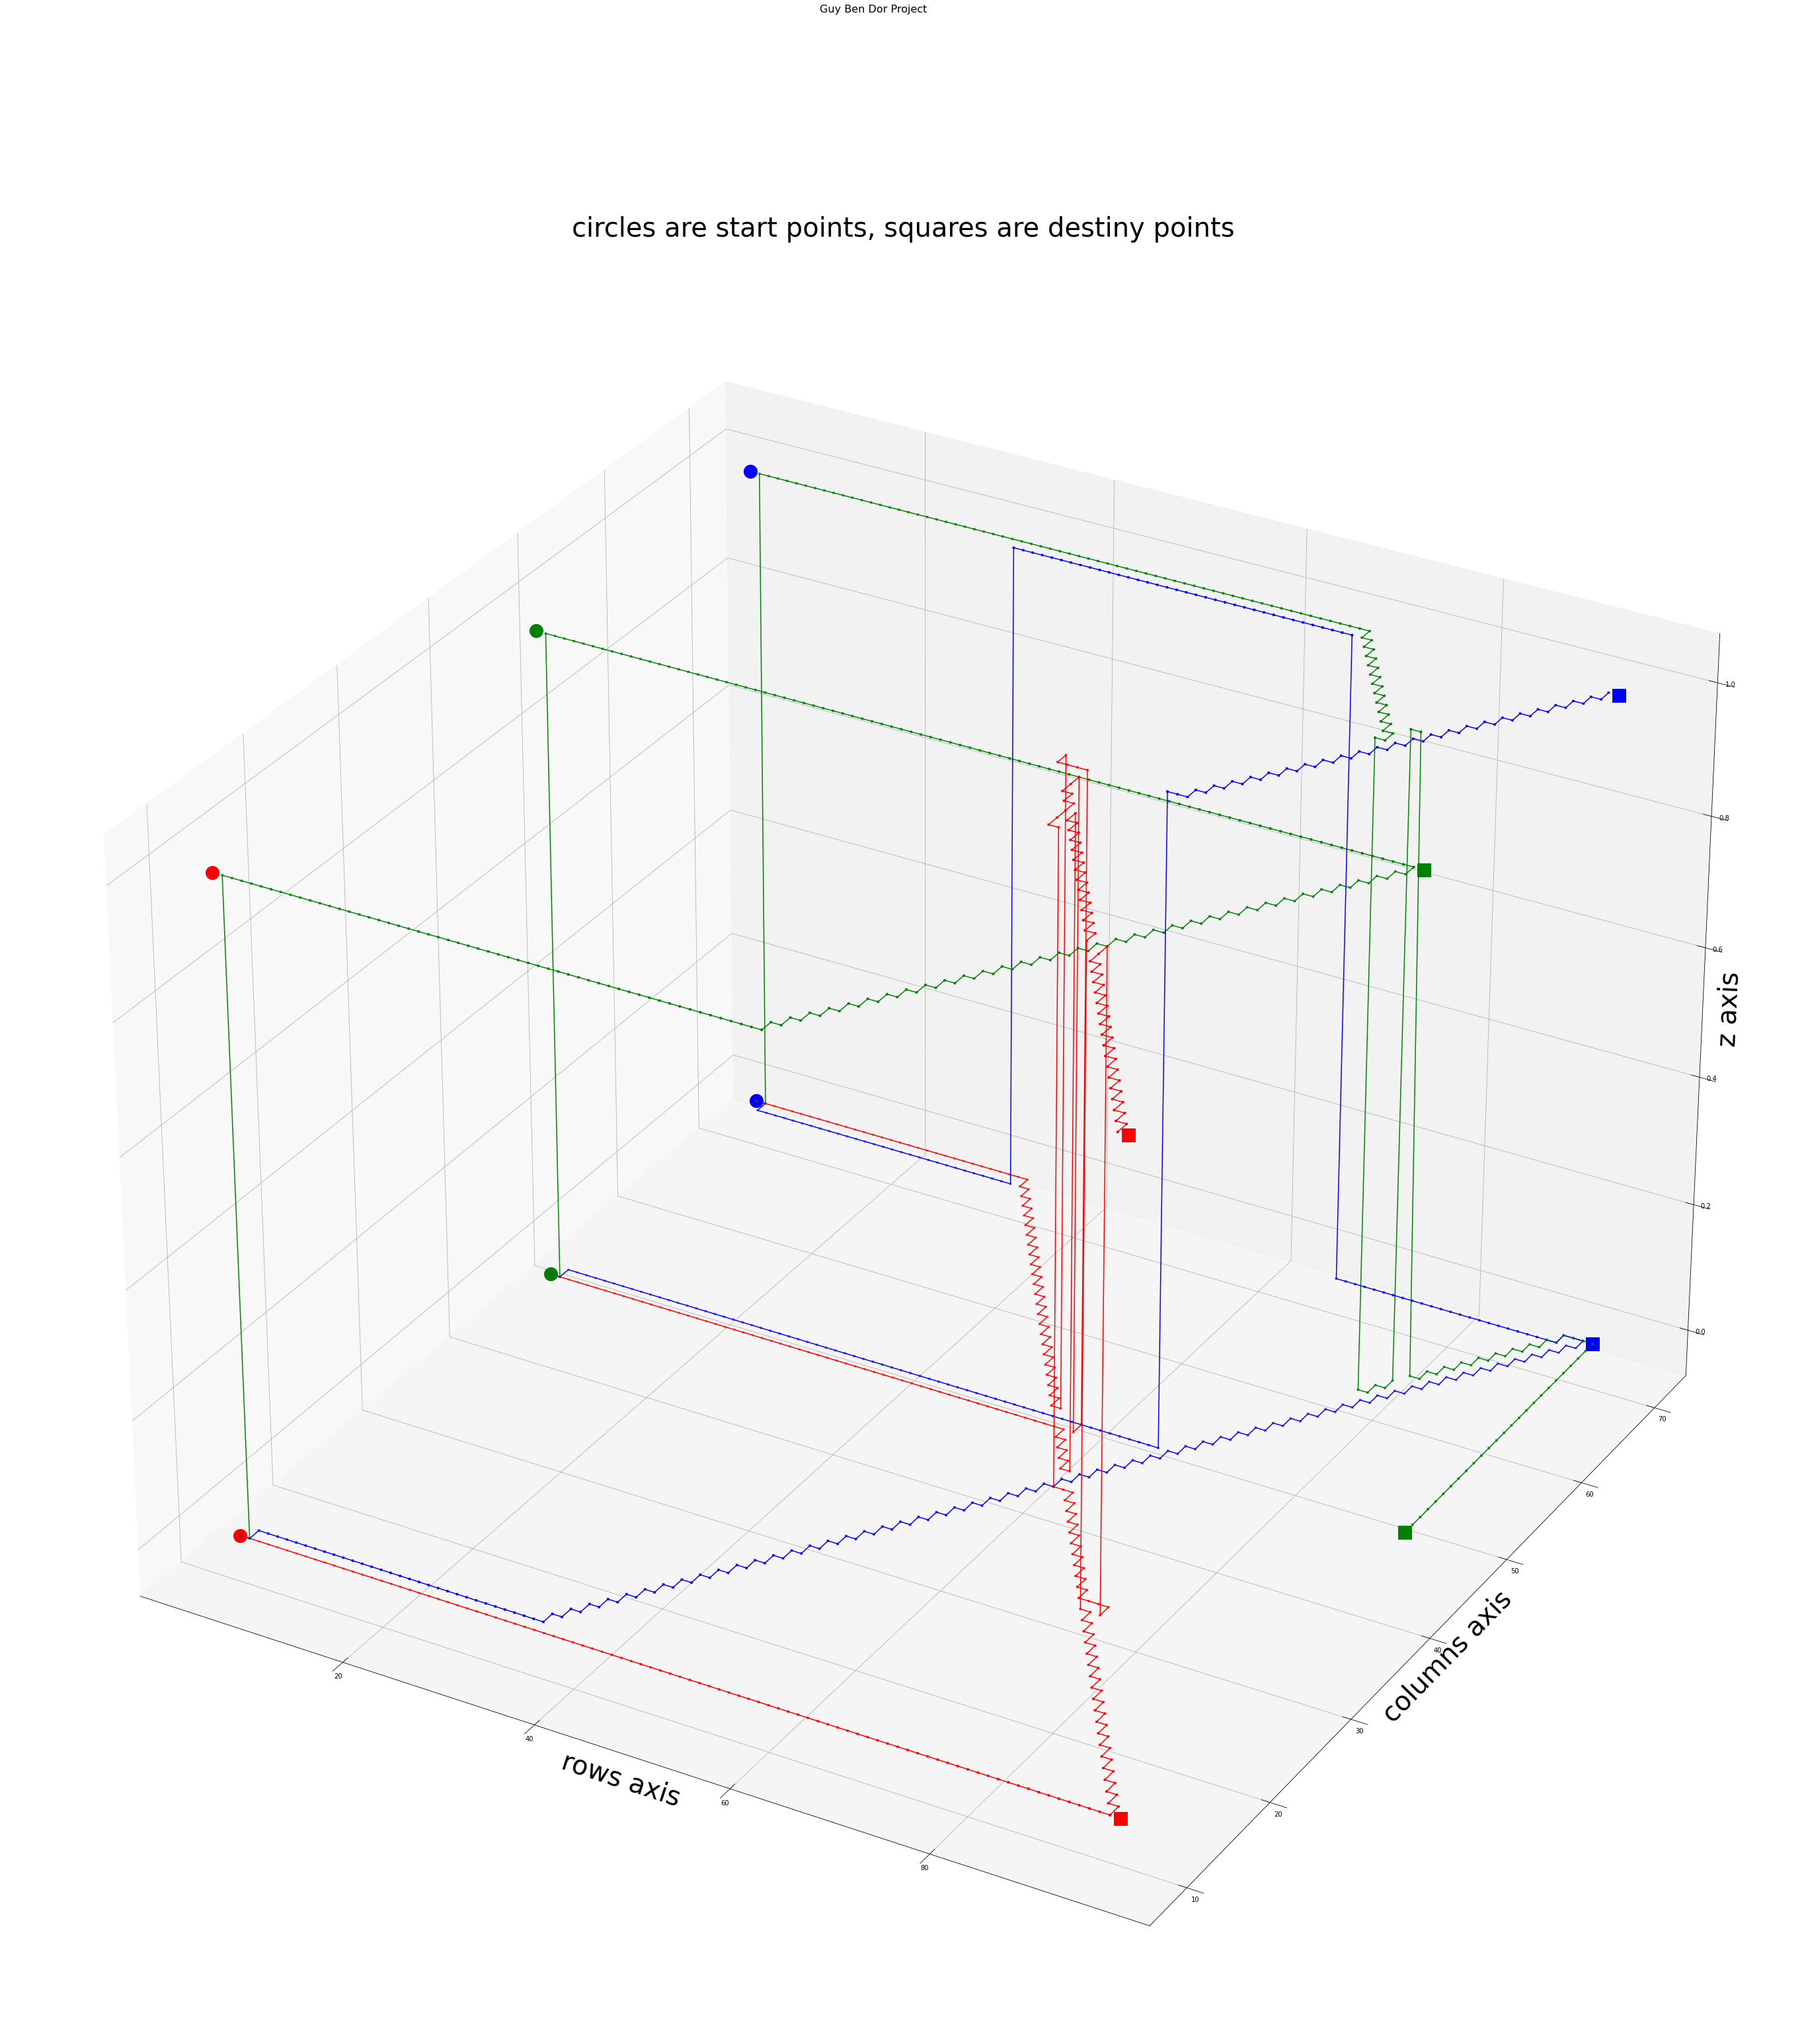

In [1]:
import numpy as np
import matplotlib.pyplot as plt


###################################################################################

def Plot_Map(points_route, num_of_points, point_start, point_destiny):

    color = ['r', 'g', 'b', 'm', 'c'] ##color array
    fig = plt.figure(figsize=(50, 50))
    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlabel('rows axis',fontsize='40')
    ax.set_ylabel('columns axis',fontsize='40')
    ax.set_zlabel('z axis',fontsize='40')
    ax.set_title('circles are start points, squares are destiny points',fontsize='40')
    plt.suptitle('Guy Ben Dor Project', fontsize=16)

    ######plot the start and end points
    for i in range(0, num_of_points):
        ax.scatter(point_start[i, 0], point_start[i, 1], 0, c=color[i], marker='o', s=400)
        ax.scatter(point_start[i, 0], point_start[i, 1], 1, c=color[i], marker='o', s=400)
        ax.scatter(point_destiny[i, 0], point_destiny[i, 1], 0, c=color[i], marker='s', s=400)
        ax.scatter(point_destiny[i, 0], point_destiny[i, 1], 1, c=color[i], marker='s', s=400)

    #### plot the way
    p=0 ## index for colors
    for i in range(0,num_of_points**2):
        for j in range (0,rows*columns):
            if points_route[i,j, 0]==0:
                points_route[i,j:rows*columns, 0]= None
                points_route[i, j:rows * columns, 1] = None
                break
        ax.scatter(points_route[i,:, 0], points_route[i,:,1], points_route[i,:,2], c=color[p], s=10,marker="X")
        ax.plot(points_route[i,:, 0], points_route[i,:,1], points_route[i,:,2], c=color[p])
        p=p+1
        if p==num_of_points:
            p=0


    plt.show()

###################################################################################

def Calc_Distance(point, point_destiny):

    distance = (point[0] - point_destiny[0])** 2 + (point[1] - point_destiny[1])** 2
    distance = np.sqrt(distance)
    return distance

###################################################################################

def Calc_Distance_Around(point, point_destiny, map_in, destiny_sign,flag_map,map1,map2):

    distance_array_dead_end = []
    points_around_dead_end = []
    distance_array_change_map = []
    points_around_change_map = []
    change_map = 0
    dead_end = 0

    point_around_temp = [point[0] - 1, point[1]] ### check point above
    distance = Calc_Distance(point_around_temp, point_destiny)
    distance_array_change_map.append(distance)
    points = [point_around_temp[0], point_around_temp[1]]
    points_around_change_map.append(points)
    if (map_in[int(point_around_temp[0]), int(point_around_temp[1])] == 0) or (map_in[int(point_around_temp[0]),int(point_around_temp[1])] == destiny_sign):
        distance = Calc_Distance(point_around_temp, point_destiny)
        distance_array_dead_end.append(distance)
        points = [point_around_temp[0],point_around_temp[1]]
        points_around_dead_end.append(points)

    point_around_temp = [point[0] + 1, point[1]]  ### check point below
    distance = Calc_Distance(point_around_temp, point_destiny)
    distance_array_change_map.append(distance)
    points = [point_around_temp[0], point_around_temp[1]]
    points_around_change_map.append(points)
    if (map_in[int(point_around_temp[0]), int(point_around_temp[1])] == 0) or (map_in[int(point_around_temp[0]),int(point_around_temp[1])] == destiny_sign):
        distance = Calc_Distance(point_around_temp, point_destiny)
        distance_array_dead_end.append(distance)
        points = [point_around_temp[0], point_around_temp[1]]
        points_around_dead_end.append(points)

    point_around_temp = [point[0] , point[1]+1]  ### check point right
    distance = Calc_Distance(point_around_temp, point_destiny)
    distance_array_change_map.append(distance)
    points = [point_around_temp[0], point_around_temp[1]]
    points_around_change_map.append(points)
    if (map_in[int(point_around_temp[0]), int(point_around_temp[1])] == 0) or (map_in[int(point_around_temp[0]),int(point_around_temp[1])] == destiny_sign):
        distance = Calc_Distance(point_around_temp, point_destiny)
        distance_array_dead_end.append(distance)
        points = [point_around_temp[0], point_around_temp[1]]
        points_around_dead_end.append(points)

    point_around_temp = [point[0], point[1] - 1]  ### check point left
    distance = Calc_Distance(point_around_temp, point_destiny)
    distance_array_change_map.append(distance)
    points = [point_around_temp[0], point_around_temp[1]]
    points_around_change_map.append(points)
    if (map_in[int(point_around_temp[0]), int(point_around_temp[1])] == 0) or (map_in[int(point_around_temp[0]),int(point_around_temp[1])] == destiny_sign):
        distance = Calc_Distance(point_around_temp, point_destiny)
        distance_array_dead_end.append(distance)
        points = [point_around_temp[0], point_around_temp[1]]
        points_around_dead_end.append(points)

    min_val = min(distance_array_change_map)
    for i in range(0, len(points_around_change_map)):
        if distance_array_change_map[i] == min_val:
            temp = points_around_change_map[i]
    if (map_in[int(temp[0]), int(temp[1])] !=0) and (map_in[int(temp[0]), int(temp[1])]!= destiny_sign):
        if flag_map: ##check if map_in is map1 or map2, if false is map 1, if true is map2
            if (map1[int(temp[0]), int(temp[1])] != 0) and (map1[int(temp[0]), int(temp[1])] != destiny_sign):
                change_map = 0
            else:
                change_map = 1
                return [temp, change_map,dead_end]
        else:
            if (map2[int(temp[0]), int(temp[1])] != 0) and (map2[int(temp[0]), int(temp[1])] != destiny_sign):
                change_map = 0
            else:
                change_map = 1
                return [temp, change_map,dead_end]


    if len(distance_array_dead_end)!=0: ##check if there is no way avaible
        min_val = min(distance_array_dead_end)
        for i in range(0,len(points_around_dead_end)):
            if distance_array_dead_end[i] == min_val:
                temp = points_around_dead_end[i]
    else:
        dead_end = 1
        temp = [0,0]

    return [temp,change_map,dead_end]

###################################################################################


def Update_point(point, point_destiny, map_in, itter, destiny_sign,point_array, point_around_array,flag_map,map1,map2):

    point_array[itter, 0] = point[0]
    point_array[itter, 1] = point[1]
    if flag_map: ##when true is map2
        point_array[itter, 2] = 1
    [point_around,change_map,dead_end] = Calc_Distance_Around(point, point_destiny, map_in, destiny_sign,flag_map,map1,map2)

    if dead_end!=1 and change_map!=1:
        point_around_array[itter,0] = point_around[0]
        point_around_array[itter,1] = point_around[1]
        if flag_map:  ##when true is map2
            point_around_array[itter, 2] = 1
    elif itter!=0:
        point_around_array[itter, 0] = point_around_array[itter-1, 0]
        point_around_array[itter, 1] = point_around_array[itter-1, 1]
        if flag_map:  ##when true is map2
            point_around_array[itter, 2] = 1


    return [point_array, point_around_array, change_map,dead_end]


###################################################################################

def Clean_Map(map1,map2,point_start, point_destiny):
    ##clean start points
    map1[int(point_start[0]), int(point_start[1])] = 0
    map1[int(point_start[0])+1, int(point_start[1])] = 0
    map1[int(point_start[0])-1, int(point_start[1])] = 0
    map1[int(point_start[0]), int(point_start[1])+1] = 0
    map1[int(point_start[0]), int(point_start[1])-1] = 0

    map2[int(point_start[0]), int(point_start[1])] = 0
    map2[int(point_start[0])+1, int(point_start[1])] = 0
    map2[int(point_start[0])-1, int(point_start[1])] = 0
    map2[int(point_start[0]), int(point_start[1])+1] = 0
    map2[int(point_start[0]), int(point_start[1])-1] = 0

    ##clean end points
    map1[point_destiny[0], point_destiny[1]] = 0
    map1[point_destiny[0]+1, point_destiny[1]] = 0
    map1[point_destiny[0]-1, point_destiny[1]] = 0
    map1[point_destiny[0], point_destiny[1]+1] = 0
    map1[point_destiny[0], point_destiny[1]-1] = 0

    map2[point_destiny[0], point_destiny[1]] = 0
    map2[point_destiny[0]+1, point_destiny[1]] = 0
    map2[point_destiny[0]-1, point_destiny[1]] = 0
    map2[point_destiny[0], point_destiny[1]+1] = 0
    map2[point_destiny[0], point_destiny[1]-1] = 0

    ##clean temp obstacles
    map1[map1==-400]=0
    map2[map2==-400]=0

    return [map1,map2]

###################################################################################
def Find_Goal(map1,map2, point_start, point_destiny, destiny_sign):

    [rows, colmuns] = np.shape(map1)
    point_destiny = point_destiny.astype('int')
    map1[point_destiny[0], point_destiny[1]] = destiny_sign
    map2[point_destiny[0], point_destiny[1]] = destiny_sign
    max_itter = rows * columns
    point_array = np.zeros((max_itter,3))
    point_around_array = np.zeros((max_itter,3))
    point = point_start
    itter = 0
    dead_end = 0
    change_map = 0
    map_in = map1
    flag_map = False ##for map,false=map1,true=map2
    flag = 0 ##index for finish

    while itter>=0:
        if dead_end == 0:
            map_in[int(point[0]), int(point[1])] = itter+1 ###make the current spot a block for the current run
        [point_array, point_around_array, change_map,dead_end] = Update_point(point, point_destiny, map_in, itter, destiny_sign, point_array, point_around_array,flag_map,map1,map2)
        if change_map == 1:
            flag_map = not(flag_map)
            if flag_map:
                map_in = map2
            else:
                map_in = map1
            itter = itter + 1
        elif dead_end == 1:
            if flag_map:  ##check if map_in is map1 or map2, if false is map 1, if true is map2
                if (map1[int(point[0]), int(point[1])] != 0) and (map1[int(point[0]), int(point[1])] != destiny_sign):
                    map_in[int(point[0]), int(point[1])] = -400
                    point = point_around_array[itter - 3, 0:2]
                    point_array[itter, 0:2] = 0
                    if point_around_array[itter-3, 2]==1:
                        flag_map = True
                    else:
                        flag_map = False
                else:
                    flag_map = not(flag_map)
                    map_in = map1
            else:
                if (map2[int(point[0]), int(point[1])] != 0) and (map2[int(point[0]), int(point[1])] != destiny_sign):
                    map_in[int(point[0]), int(point[1])] = -400
                    point = point_around_array[itter-3, 0:2]
                    point_array[itter,0:2]=0
                    if point_around_array[itter-3, 2]==1:
                        flag_map = True
                    else:
                        flag_map = False

                else:
                    flag_map = not(flag_map)
                    map_in = map2

            itter = itter - 1
        else:
            point = point_around_array[itter, 0:2]
            flag = Compare_Points(point_destiny, point)
            itter = itter + 1
        if flag==1:
            break
        if itter >= max_itter or itter<0:
            point_array = np.zeros((max_itter, 3))
            print('failed')
            break

    map1,map2 = Clean_Map(map1,map2,point_start, point_destiny)

    return point_array

###################################################################################

def Compare_Points(point1, point2):

    if point1[0] == point2[0] and point1[1] == point2[1]:
        flag = 1
    else:
        flag = 0
    return flag

###################################################################################

def Create_Point(num,index):

    arr_y = [10, 45, 70]
    if num == 0: ### start point
        x = 5
        y = arr_y[index]
    else: ### destiny point
        x = 95
        y =  arr_y[index]
    point = []
    point.append(x)
    point.append(y)
    return point

###################################################################################

def Generate_Points(index):

    point_start = Create_Point(0,index)
    point_destiny = Create_Point(1,index)

    point_start = np.array(point_start)
    point_start = np.transpose(point_start)
    point_destiny = np.array(point_destiny)
    point_destiny = np.transpose(point_destiny)
    return [point_start,point_destiny]

###################################################################################

def Generate_Map(rows, columns):

    map = np.zeros((rows,columns))
    map[0: rows, 0] = block_sign
    map[0, 0: columns] = block_sign
    map[0: rows, columns - 1] = block_sign
    map[rows - 1, 0: columns] = block_sign

    return map

###################################################################################

if __name__ == '__main__':
    rows = 100
    columns = 100
    num_of_points = 3

    ################### signs
    block_sign = -500 ### can not go thorugh it
    destiny_sign = -1


    ################### generate  map
    map1 = Generate_Map(rows, columns)
    map2 = Generate_Map(rows, columns)

    ################### generate start and destiny points
    point_start = np.zeros((num_of_points, 2))
    point_destiny = np.zeros((num_of_points, 2))
    for i in range(0,num_of_points):
        [point_start[i,0:2], point_destiny[i,0:2]]=Generate_Points(i)

    ################### find goal
    points_route = np.zeros((num_of_points**2,rows * columns,3))
    p = 0 ##for points route index
    for i in range(0,num_of_points):
        for j in range(0,num_of_points):
            points_route[p,:, :]=Find_Goal(map1,map2, point_start[i,0:2], point_destiny[j,0:2], destiny_sign)
            p= p + 1

    ################### plot map
    Plot_Map(points_route, num_of_points, point_start, point_destiny)

